# Fraud Analysis 

## Data Introduction 

In [1]:
import pandas as pd
import numpy as np
import tkinter as tk
import matplotlib.pyplot as plt
import matplotlib as mpl
from tkinter import filedialog
from pandas import DataFrame
import seaborn as sns

In [2]:
# Upload Data  
train_benFile= "C:/Users/Nicole/Desktop/fraud_detection/Train_Beneficiarydata-1542865627584.csv"
train_ben= pd.read_csv(train_benFile)
train_ben


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,...,2,2,2,2,2,2,0,0,430,460
138552,BENE159195,1938-12-01,NaN,2,1,0,49,530,12,12,...,2,1,2,2,2,2,0,0,880,100
138553,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,...,1,1,1,2,2,2,2000,1068,3240,1390
138554,BENE159197,1930-01-01,NaN,1,1,0,16,560,12,12,...,2,2,1,2,2,2,0,0,2650,10


In [3]:
train_inpatientFile= "C:/Users/Nicole/Desktop/fraud_detection/Train_Inpatientdata-1542865627584.csv"
train_inpatient= pd.read_csv(train_inpatientFile)
train_inpatient

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,79092,70704,2869,4148,9904.0,NaN,NaN,NaN,NaN,NaN
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,49122,4254,5990,NaN,8605.0,NaN,NaN,NaN,NaN,NaN
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,71534,71590,V4502,NaN,9390.0,NaN,NaN,NaN,NaN,NaN
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,4263,0414,41400,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
train_outpatientFile= "C:/Users/Nicole/Desktop/fraud_detection/Train_Outpatientdata-1542865627584.csv"
train_outpatient= pd.read_csv(train_outpatientFile)
train_outpatient 

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,2163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,07041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,V570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


#### Test Sets 

In [5]:
test_benFile= "C:/Users/Nicole/Desktop/fraud_detection/Test_Beneficiarydata-1542969243754.csv"
test_ben= pd.read_csv(test_benFile)
test_ben

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,2,1,1,1,2,2,0,0,1170,660
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,...,1,2,1,2,2,2,21260,2136,120,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63963,BENE159187,1959-07-01,NaN,1,1,0,27,140,12,12,...,1,1,1,2,2,2,0,0,2650,450
63964,BENE159193,1936-12-01,NaN,2,1,0,36,170,12,12,...,2,2,2,2,2,2,0,0,110,50
63965,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,...,2,2,2,2,2,2,0,0,430,460
63966,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,...,1,1,1,2,2,2,2000,1068,3240,1390


In [6]:
test_inpatientFile= "C:/Users/Nicole/Desktop/fraud_detection/Test_Inpatientdata-1542969243754.csv"
test_inpatient= pd.read_csv(test_inpatientFile)
test_inpatient

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,...,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,...,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,BENE159139,CLM61015,2009-07-24,2009-07-26,PRV55021,23000,PHY406228,PHY406228,NaN,2009-07-24,...,53540,5715,56210,NaN,5122.0,4019.0,NaN,NaN,NaN,NaN
9547,BENE159143,CLM42885,2009-03-16,2009-03-29,PRV55017,34000,PHY354080,NaN,NaN,2009-03-16,...,78720,72402,V5413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9548,BENE159155,CLM67124,2009-09-07,2009-10-12,PRV53758,5000,PHY338118,NaN,NaN,2009-09-07,...,E8798,60000,28521,4280,NaN,NaN,NaN,NaN,NaN,NaN
9549,BENE159181,CLM72016,2009-10-14,2009-10-17,PRV57195,3000,PHY328451,NaN,NaN,2009-10-14,...,2724,25080,29383,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
test_outpatientFile= "C:/Users/Nicole/Desktop/fraud_detection/Test_Outpatientdata-1542969243754.csv"
test_outpatient= pd.read_csv(test_outpatientFile)
test_outpatient 

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11007,CLM496381,2009-07-29,2009-07-29,PRV56573,10,PHY393253,PHY347995,NaN,58889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5939
4,BENE11007,CLM521391,2009-08-12,2009-08-12,PRV56573,10,PHY417685,NaN,PHY382041,V666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125836,BENE159193,CLM469576,2009-07-14,2009-07-14,PRV55485,70,PHY431265,NaN,NaN,79021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
125837,BENE159193,CLM483842,2009-07-22,2009-07-22,PRV55485,10,PHY369098,NaN,NaN,72811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
125838,BENE159193,CLM554925,2009-08-31,2009-08-31,PRV55485,30,PHY431298,NaN,NaN,9181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,92420
125839,BENE159194,CLM347777,2009-05-08,2009-05-08,PRV55889,30,PHY406767,NaN,PHY406767,V4582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


### Merged Datasets for Train and Test 

#### Since we will most likely clean both the train and test sets, it makes sense to remerge the inpatient and outpatient test and train set 

In [8]:
frames_outpatient= [train_outpatient, test_outpatient]

In [9]:
merged_outpatient= pd.concat(frames_outpatient)
merged_outpatient

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125836,BENE159193,CLM469576,2009-07-14,2009-07-14,PRV55485,70,PHY431265,NaN,NaN,79021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
125837,BENE159193,CLM483842,2009-07-22,2009-07-22,PRV55485,10,PHY369098,NaN,NaN,72811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
125838,BENE159193,CLM554925,2009-08-31,2009-08-31,PRV55485,30,PHY431298,NaN,NaN,9181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,92420
125839,BENE159194,CLM347777,2009-05-08,2009-05-08,PRV55889,30,PHY406767,NaN,PHY406767,V4582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [10]:
frames_inpatient= [train_inpatient, test_inpatient]

In [11]:
merged_inpatient= pd.concat(frames_inpatient)
merged_inpatient

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,BENE159139,CLM61015,2009-07-24,2009-07-26,PRV55021,23000,PHY406228,PHY406228,NaN,2009-07-24,...,53540,5715,56210,NaN,5122.0,4019.0,NaN,NaN,NaN,NaN
9547,BENE159143,CLM42885,2009-03-16,2009-03-29,PRV55017,34000,PHY354080,NaN,NaN,2009-03-16,...,78720,72402,V5413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9548,BENE159155,CLM67124,2009-09-07,2009-10-12,PRV53758,5000,PHY338118,NaN,NaN,2009-09-07,...,E8798,60000,28521,4280,NaN,NaN,NaN,NaN,NaN,NaN
9549,BENE159181,CLM72016,2009-10-14,2009-10-17,PRV57195,3000,PHY328451,NaN,NaN,2009-10-14,...,2724,25080,29383,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
frames_ben= [train_ben,test_ben]

In [13]:
merged_ben= pd.concat(frames_ben)
merged_ben

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63963,BENE159187,1959-07-01,NaN,1,1,0,27,140,12,12,...,1,1,1,2,2,2,0,0,2650,450
63964,BENE159193,1936-12-01,NaN,2,1,0,36,170,12,12,...,2,2,2,2,2,2,0,0,110,50
63965,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,...,2,2,2,2,2,2,0,0,430,460
63966,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,...,1,1,1,2,2,2,2000,1068,3240,1390


### Number of Unique Beneficiaries, Providers and Claims in each Dataset 

#### Training Sets 

In [14]:
train_ben['BeneID'].nunique()

138556

In [15]:
train_outpatient['BeneID'].nunique()

133980

In [16]:
train_outpatient['ClaimID'].nunique()

517737

In [17]:
train_outpatient['Provider'].nunique()

5012

In [18]:
train_inpatient['BeneID'].nunique()

31289

In [19]:
train_inpatient['ClaimID'].nunique()

40474

In [20]:
train_inpatient['Provider'].nunique()

2092

#### Test Sets 

In [21]:
test_ben['BeneID'].nunique()

63968

In [22]:
test_outpatient['BeneID'].nunique()

59608

In [23]:
test_outpatient['ClaimID'].nunique()

125841

In [24]:
test_outpatient['Provider'].nunique()

1259

In [25]:
test_inpatient['BeneID'].nunique()

8351

In [26]:
test_inpatient['ClaimID'].nunique()

9551

In [27]:
test_inpatient['Provider'].nunique()

520

In [28]:
train_ben.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

### Explore Unique Values 

#### Have in mind the data types that we need to work with 

In [29]:
train_inpatient.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCo

In [30]:
train_outpatient.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCode_6        float64
DeductibleAmtPaid           int64
ClmAdmitDiagnosisCode      object
dtype: object

In [31]:
test_ben.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

#### Should we merge the inpatient and outpatient information given that there are some patients and/or providers that are both in the inpatient and outpatient datasets?  

In [32]:
ben_list_inpatient= merged_inpatient['BeneID'].unique()
ben_in= pd.DataFrame(ben_list_inpatient)
ben_in

,0
0,BENE11001
1,BENE11011
2,BENE11014
3,BENE11017
4,BENE11018
...,...
37413,BENE159117
37414,BENE159139
37415,BENE159155
37416,BENE159181


In [33]:
# create a list with all unique beneficiary IDs in the outpatient dataset. 
ben_list_outpatient= merged_outpatient['BeneID'].unique()
# convert list to a df 
ben_out= pd.DataFrame(ben_list_outpatient)
ben_out

,0
0,BENE11002
1,BENE11003
2,BENE11004
3,BENE11005
4,BENE11006
...,...
144184,BENE159088
144185,BENE159135
144186,BENE159144
144187,BENE159149


In [34]:
# create another list which contains entries that are both in outpatient and inpatient file 
overlap=ben_out.isin(ben_in)
# to access the .unique() function, we convert overlap to a series 
overlap= overlap.squeeze()
type(overlap)

# Since there are no "True"values, then we do not have any overlap
overlap.unique()


array([False])

In [35]:
# we do the same for providers  
prov_list_inpatient= merged_inpatient['Provider'].unique()
prov_in= pd.DataFrame(prov_list_inpatient)
prov_in

,0
0,PRV55912
1,PRV55907
2,PRV56046
3,PRV52405
4,PRV56614
...,...
2607,PRV56817
2608,PRV54826
2609,PRV54987
2610,PRV52023


In [36]:
prov_list_outpatient= merged_outpatient['Provider'].unique()
prov_out= pd.DataFrame(prov_list_outpatient)
prov_out

,0
0,PRV56011
1,PRV57610
2,PRV57595
3,PRV55951
4,PRV55903
...,...
6266,PRV56372
6267,PRV54617
6268,PRV53736
6269,PRV53089


In [37]:
overlap_prov=prov_out.isin(prov_in)
overlap_prov= overlap_prov.squeeze()
type(overlap_prov)

overlap_prov.unique()

array([False])

#### There is no overlap and so there is no value in merging the inpatient and outpatient files. This simplifies our workflow. Now we need to merge the beneficiary information to both the inpatient and outpatient datasets 

In [38]:
tmp_out= merged_outpatient

In [39]:
tmp_ben= merged_ben

In [40]:
inner_join_out=pd.merge(tmp_out,tmp_ben, on='BeneID', how='inner')
inner_join_out

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,2,2,0,0,30,50
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,2,2,1,2,2,2,0,0,90,40
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,2,1,1,1,1,2,0,0,1810,760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980584,BENE159144,CLM174166,2009-02-03,2009-02-03,PRV55844,10,PHY374369,NaN,NaN,V6759,...,2,2,2,2,2,2,0,0,10,0
980585,BENE159149,CLM631108,2009-10-14,2009-11-03,PRV54987,600,PHY364693,PHY364693,PHY364693,V560,...,2,2,2,2,2,2,0,0,600,500
980586,BENE159193,CLM469576,2009-07-14,2009-07-14,PRV55485,70,PHY431265,NaN,NaN,79021,...,2,2,2,2,2,2,0,0,110,50
980587,BENE159193,CLM483842,2009-07-22,2009-07-22,PRV55485,10,PHY369098,NaN,NaN,72811,...,2,2,2,2,2,2,0,0,110,50


In [41]:
#No NAN claimid value so each beneID was matched to a claim 
inner_join_out.ClaimID.unique()

array(['CLM624349', 'CLM189947', 'CLM438021', ..., 'CLM469576',
       'CLM483842', 'CLM554925'], dtype=object)

#### To double check the merge, we see if the expected number of cols and rows are reflected in the new dataset. We get a df with 980589 rows × 51 columns which is correct. 

In [42]:
tmp_in= merged_inpatient

In [43]:
inner_join_in=pd.merge(tmp_in,tmp_ben, on='BeneID', how='inner')
inner_join_in

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,1,2,1,1,36000,3204,60,70
2,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,1,2,1,1,36000,3204,60,70
3,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,1,2,1,1,36000,3204,60,70
4,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,1,2,1,1,36000,3204,60,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76822,BENE159155,CLM67124,2009-09-07,2009-10-12,PRV53758,5000,PHY338118,NaN,NaN,2009-09-07,...,2,1,1,2,2,2,13600,1068,0,0
76823,BENE159181,CLM72016,2009-10-14,2009-10-17,PRV57195,3000,PHY328451,NaN,NaN,2009-10-14,...,1,1,1,2,2,2,3000,1068,3440,260
76824,BENE159181,CLM72016,2009-10-14,2009-10-17,PRV57195,3000,PHY328451,NaN,NaN,2009-10-14,...,1,1,1,2,2,2,3000,1068,3440,260
76825,BENE159196,CLM47313,2009-04-17,2009-04-18,PRV51854,2000,PHY377087,NaN,NaN,2009-04-17,...,1,1,1,2,2,2,2000,1068,3240,1390


In [44]:
inner_join_in.ClaimID.unique()

array(['CLM46614', 'CLM66048', 'CLM68358', ..., 'CLM67124', 'CLM72016',
       'CLM47313'], dtype=object)

#### We do the same check and for the inpatient dataset, we get a df with 76827 rows × 54 columns which is correct. 

### Exploring NaNs 

#### For outpatient dataset, it is worth keeping the column ClmDiagnosisCode_n up to n=10. As for .ClmProcedureCode_n, we can definately drop  n= 5,6 and keep the rest.

In [45]:
inner_join_out.ClmDiagnosisCode_10.unique()

array([nan, 'V059', '4019', 'V4581', '2720', '490', '1970', '7962',
       '25000', '78909', 'V420', '78650', '8074', 'V1005', '74685',
       'V072', '5856', '2733', '7804', '2449', 'E8490', '1539', '25200',
       '4240', '2763', '29410', '70719', '25080', 'V140', '78079', 'V065',
       'E887', '29680', '41401', '28803', '1619', '34590', 'E9060',
       '56210', '7354', '87363', '9140', '7802', '53081', '4168', '30500',
       '2768', '514', '29590', '25002', '8860', '412', '99591', 'V1046',
       '4439', '2869', '42731', '7220', '5849', '20280', 'E8889', '33811',
       'V5867', 'V5883', '42789', '135', '9100', '95901', '4820', '7282',
       '2724', '58881', '7291', 'V078', '1976', '51889', '71699', 'E8859',
       '72402', 'E9600', '72887', 'E8809', '73392', 'V4573', '3970',
       '3572', 'V5861', '72888', '0389', 'E8782', '71946', '70714',
       '3439', '36441', 'E8496', '29620', '8470', '4400', '95909',
       '40391', 'E918', '78900', '7197', 'V142', '2639', 'E9289', 'E8881

In [46]:
inner_join_out.ClmProcedureCode_6.unique()

array([nan])

In [47]:
inner_join_out.ClmProcedureCode_5.unique()

array([nan])

In [48]:
inner_join_out.ClmProcedureCode_4.unique()

array([  nan, 7840.,  311.])

In [49]:
#drop_outp= ['ClmProcedureCode_6','ClmProcedureCode_5']

In [50]:
#inner_join_out= inner_join_out.drop(drop_outp, axis=1)
#inner_join_out

In [51]:
outpatient=inner_join_out
outpatient

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,2,2,0,0,30,50
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,2,2,1,2,2,2,0,0,90,40
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,2,1,1,1,1,2,0,0,1810,760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980584,BENE159144,CLM174166,2009-02-03,2009-02-03,PRV55844,10,PHY374369,NaN,NaN,V6759,...,2,2,2,2,2,2,0,0,10,0
980585,BENE159149,CLM631108,2009-10-14,2009-11-03,PRV54987,600,PHY364693,PHY364693,PHY364693,V560,...,2,2,2,2,2,2,0,0,600,500
980586,BENE159193,CLM469576,2009-07-14,2009-07-14,PRV55485,70,PHY431265,NaN,NaN,79021,...,2,2,2,2,2,2,0,0,110,50
980587,BENE159193,CLM483842,2009-07-22,2009-07-22,PRV55485,10,PHY369098,NaN,NaN,72811,...,2,2,2,2,2,2,0,0,110,50


In [52]:
inner_join_out.isnull().sum()

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   2624
OperatingPhysician                 809821
OtherPhysician                     613477
ClmDiagnosisCode_1                  19724
ClmDiagnosisCode_2                 368811
ClmDiagnosisCode_3                 593933
ClmDiagnosisCode_4                 741643
ClmDiagnosisCode_5                 839458
ClmDiagnosisCode_6                 888001
ClmDiagnosisCode_7                 917827
ClmDiagnosisCode_8                 936857
ClmDiagnosisCode_9                 952299
ClmDiagnosisCode_10                978547
ClmProcedureCode_1                 980278
ClmProcedureCode_2                 980518
ClmProcedureCode_3                 980579
ClmProcedureCode_4                 980586
ClmProcedureCode_5                

In [53]:
inner_join_in.isnull().sum()

BeneID                                 0
ClaimID                                0
ClaimStartDt                           0
ClaimEndDt                             0
Provider                               0
InscClaimAmtReimbursed                 0
AttendingPhysician                   229
OperatingPhysician                 31726
OtherPhysician                     68089
AdmissionDt                            0
ClmAdmitDiagnosisCode                  0
DeductibleAmtPaid                   1787
DischargeDt                            0
DiagnosisGroupCode                     0
ClmDiagnosisCode_1                     0
ClmDiagnosisCode_2                   424
ClmDiagnosisCode_3                  1271
ClmDiagnosisCode_4                  2912
ClmDiagnosisCode_5                  5452
ClmDiagnosisCode_6                  9108
ClmDiagnosisCode_7                 13589
ClmDiagnosisCode_8                 18563
ClmDiagnosisCode_9                 25363
ClmDiagnosisCode_10                69506
ClmProcedureCode

### Handling NaNs

#### For Inpatient dataset, it is worth keeping the column ClmDiagnosisCode_n up to n=10. As for .ClmProcedureCode_n, we can definately drop  'ClmProcedureCode_6' and keep the rest

In [54]:
inner_join_in.ClmDiagnosisCode_10.unique()

array([nan, '4280', '41401', ..., '78550', '5651', '60091'], dtype=object)

In [55]:
inner_join_in.ClmProcedureCode_6.unique()

array([nan])

In [56]:
inner_join_in.ClmProcedureCode_5.unique()

array([  nan, 4139., 5185., 9972., 4422., 2724., 9971., 9982.])

In [57]:
inner_join_in.ClmProcedureCode_4.unique()

array([  nan,   42., 4414., 4104., 7999., 1122., 5849., 2724., 4439.,
        496., 4011., 3572., 4019., 6822.,  185., 4269., 7804., 4139.,
       9974., 2761., 5771., 7840., 5185., 2762., 3963., 7824., 7823.,
       9986., 2749., 2763.,  311., 5121., 4263., 5845., 3320., 2752.,
       7851., 4660., 7802., 4422., 3849., 1511.,  412., 4240., 5789.,
       3962., 5119., 3844., 3343., 4266., 7994.,  260.,  481., 9971.,
       5781., 8670.])

In [58]:
drop_inp= ['ClmProcedureCode_6']

In [59]:
inpatient= inner_join_in.drop(drop_inp, axis=1)
inpatient


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,1,2,1,1,36000,3204,60,70
2,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,1,2,1,1,36000,3204,60,70
3,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,1,2,1,1,36000,3204,60,70
4,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,1,2,1,1,36000,3204,60,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76822,BENE159155,CLM67124,2009-09-07,2009-10-12,PRV53758,5000,PHY338118,NaN,NaN,2009-09-07,...,2,1,1,2,2,2,13600,1068,0,0
76823,BENE159181,CLM72016,2009-10-14,2009-10-17,PRV57195,3000,PHY328451,NaN,NaN,2009-10-14,...,1,1,1,2,2,2,3000,1068,3440,260
76824,BENE159181,CLM72016,2009-10-14,2009-10-17,PRV57195,3000,PHY328451,NaN,NaN,2009-10-14,...,1,1,1,2,2,2,3000,1068,3440,260
76825,BENE159196,CLM47313,2009-04-17,2009-04-18,PRV51854,2000,PHY377087,NaN,NaN,2009-04-17,...,1,1,1,2,2,2,2000,1068,3240,1390


In [60]:
outpatient= inner_join_out
outpatient

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,2,2,0,0,30,50
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,2,2,1,2,2,2,0,0,90,40
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,2,1,1,1,1,2,0,0,1810,760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980584,BENE159144,CLM174166,2009-02-03,2009-02-03,PRV55844,10,PHY374369,NaN,NaN,V6759,...,2,2,2,2,2,2,0,0,10,0
980585,BENE159149,CLM631108,2009-10-14,2009-11-03,PRV54987,600,PHY364693,PHY364693,PHY364693,V560,...,2,2,2,2,2,2,0,0,600,500
980586,BENE159193,CLM469576,2009-07-14,2009-07-14,PRV55485,70,PHY431265,NaN,NaN,79021,...,2,2,2,2,2,2,0,0,110,50
980587,BENE159193,CLM483842,2009-07-22,2009-07-22,PRV55485,10,PHY369098,NaN,NaN,72811,...,2,2,2,2,2,2,0,0,110,50


### EDA Insights 

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns


### Inpatient 

In [62]:
## Claim per provider 
claim_per_provider = inpatient.groupby(by=['Provider'])['ClaimID'].agg(['count'])
## still get M, M, M 
claim_per_provider.reset_index()

,Provider,count
0,PRV51001,8
1,PRV51003,97
2,PRV51007,6
3,PRV51008,3
4,PRV51009,3
...,...,...
2607,PRV57719,6
2608,PRV57728,1
2609,PRV57729,15
2610,PRV57732,20


array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

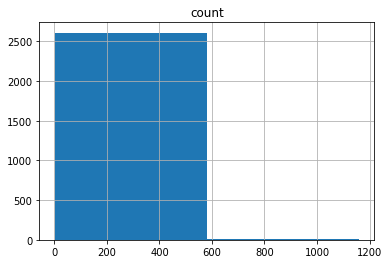

In [63]:
claim_per_provider.hist(column='count',bins=2)

In [64]:
claim_per_provider.mean()

count    29.413093
dtype: float64

In [65]:
claim_per_provider.min()

count    1
dtype: int64

In [66]:
claim_per_provider.max()

count    1160
dtype: int64

In [67]:
bene_per_claim = inpatient.groupby(by=['BeneID'])['ClaimID'].agg(['count'])
bene_per_claim

,count
BeneID,
BENE100002,2
BENE100004,4
BENE100006,1
BENE100007,1
BENE100010,4
...,...
BENE99965,1
BENE99974,1
BENE99976,1


array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

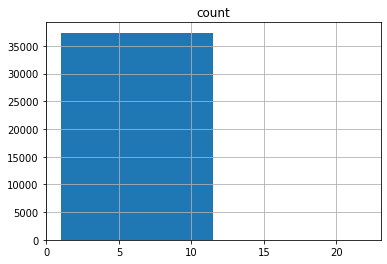

In [68]:
bene_per_claim.hist(column='count',bins=2)

In [69]:
bene_per_claim.mean()

count    2.05321
dtype: float64

In [70]:
bene_per_claim.max()

count    22
dtype: int64

In [71]:
bene_per_claim.min()

count    1
dtype: int64

In [72]:
inpatient['InscClaimAmtReimbursed'].mean()

10086.400484204773

In [73]:
inpatient['InscClaimAmtReimbursed'].max()

125000

In [74]:
inpatient['InscClaimAmtReimbursed'].min()

0

### Outpatient

In [75]:
## Claim per provider 
claim_per_provider_out = outpatient.groupby(by=['Provider'])['ClaimID'].agg(['count'])
## still get M, M, M 
claim_per_provider_out.reset_index()

,Provider,count
0,PRV51001,28
1,PRV51002,396
2,PRV51003,115
3,PRV51004,228
4,PRV51005,1545
...,...,...
6266,PRV57759,55
6267,PRV57760,26
6268,PRV57761,117
6269,PRV57762,1


(array([6.225e+03, 3.600e+01, 8.000e+00, 1.000e+00, 1.000e+00]),
 array([1.0000e+00, 2.2820e+03, 4.5630e+03, 6.8440e+03, 9.1250e+03,
        1.1406e+04]),
 <BarContainer object of 5 artists>)

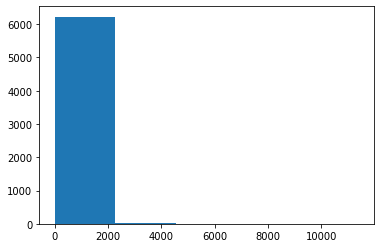

In [76]:
#claim_per_provider_out.hist(column='count',bins=2)
plt.hist(claim_per_provider_out, bins=5)

In [77]:
claim_per_provider_out.mean()

count    156.368841
dtype: float64

In [78]:
claim_per_provider_out.max()

count    11406
dtype: int64

In [79]:
bene_per_claim_out= inpatient.groupby(by=['BeneID'])['ClaimID'].agg(['count'])
bene_per_claim_out

,count
BeneID,
BENE100002,2
BENE100004,4
BENE100006,1
BENE100007,1
BENE100010,4
...,...
BENE99965,1
BENE99974,1
BENE99976,1


array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

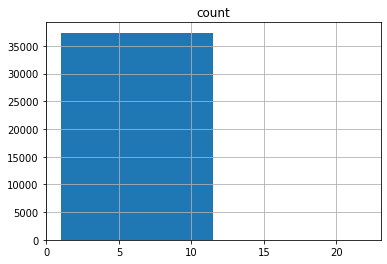

In [80]:
bene_per_claim_out.hist(column='count',bins=2)

In [81]:
bene_per_claim_out.mean()

count    2.05321
dtype: float64

In [82]:
bene_per_claim_out.max()

count    22
dtype: int64

In [83]:
bene_per_claim_out.min()

count    1
dtype: int64

In [84]:
outpatient['InscClaimAmtReimbursed'].mean()

291.489359966306

In [85]:
outpatient['InscClaimAmtReimbursed'].max()

102500

In [86]:
outpatient['InscClaimAmtReimbursed'].min()

0

## Value Replacements 

In [87]:
from datetime import date
import numpy as np

### Inpatient Dataset

#### Calculating Number of Days patient was admitted then drop 'AdmissionDt' and 'DischargeDt'. We will do the same to the dates associated with claim dates  

In [88]:
# Dates are object types 
inpatient.dtypes

BeneID                              object
ClaimID                             object
ClaimStartDt                        object
ClaimEndDt                          object
Provider                            object
InscClaimAmtReimbursed               int64
AttendingPhysician                  object
OperatingPhysician                  object
OtherPhysician                      object
AdmissionDt                         object
ClmAdmitDiagnosisCode               object
DeductibleAmtPaid                  float64
DischargeDt                         object
DiagnosisGroupCode                  object
ClmDiagnosisCode_1                  object
ClmDiagnosisCode_2                  object
ClmDiagnosisCode_3                  object
ClmDiagnosisCode_4                  object
ClmDiagnosisCode_5                  object
ClmDiagnosisCode_6                  object
ClmDiagnosisCode_7                  object
ClmDiagnosisCode_8                  object
ClmDiagnosisCode_9                  object
ClmDiagnosi

In [89]:
tmp_date= inpatient

In [90]:
tmp_date['AdmissionDt']= pd.to_datetime(tmp_date['AdmissionDt'])

In [91]:
tmp_date['DischargeDt']= pd.to_datetime(tmp_date['DischargeDt'])

In [92]:
tmp_date['AdmitDays']=tmp_date['DischargeDt'] - tmp_date['AdmissionDt']



In [93]:
#tmp_date.AdmitDays=tmp_date.AdmitDays.astype('int64')
#tmp_date.iloc[0]['ClaimDays']

In [94]:
tmp_date['AdmitDays']= tmp_date['AdmitDays'].apply(lambda x: x.days)

In [95]:
tmp_date

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,AdmitDays
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,6
1,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,6
2,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,2,1,1,36000,3204,60,70,2
3,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,2,1,1,36000,3204,60,70,2
4,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,2,1,1,36000,3204,60,70,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76822,BENE159155,CLM67124,2009-09-07,2009-10-12,PRV53758,5000,PHY338118,NaN,NaN,2009-09-07,...,1,1,2,2,2,13600,1068,0,0,35
76823,BENE159181,CLM72016,2009-10-14,2009-10-17,PRV57195,3000,PHY328451,NaN,NaN,2009-10-14,...,1,1,2,2,2,3000,1068,3440,260,3
76824,BENE159181,CLM72016,2009-10-14,2009-10-17,PRV57195,3000,PHY328451,NaN,NaN,2009-10-14,...,1,1,2,2,2,3000,1068,3440,260,3
76825,BENE159196,CLM47313,2009-04-17,2009-04-18,PRV51854,2000,PHY377087,NaN,NaN,2009-04-17,...,1,1,2,2,2,2000,1068,3240,1390,1


#### Delta days for claims 

In [96]:
tmp_date['ClaimStartDt']= pd.to_datetime(tmp_date['ClaimStartDt'])
tmp_date['ClaimEndDt']= pd.to_datetime(tmp_date['ClaimEndDt'])

In [97]:
tmp_date['ClaimDays']=tmp_date['DischargeDt'] - tmp_date['AdmissionDt']
#tmp_date.ClaimDays=tmp_date.ClaimDays.astype('int64')

In [98]:
#tmp_date['ClaimDays']= tmp_date['ClaimDays'].apply(lambda x: x.days)

In [99]:
#might need to drop later
tmp_date.dtypes

BeneID                                      object
ClaimID                                     object
ClaimStartDt                        datetime64[ns]
ClaimEndDt                          datetime64[ns]
Provider                                    object
InscClaimAmtReimbursed                       int64
AttendingPhysician                          object
OperatingPhysician                          object
OtherPhysician                              object
AdmissionDt                         datetime64[ns]
ClmAdmitDiagnosisCode                       object
DeductibleAmtPaid                          float64
DischargeDt                         datetime64[ns]
DiagnosisGroupCode                          object
ClmDiagnosisCode_1                          object
ClmDiagnosisCode_2                          object
ClmDiagnosisCode_3                          object
ClmDiagnosisCode_4                          object
ClmDiagnosisCode_5                          object
ClmDiagnosisCode_6             

## Drop unwated cols 

In [100]:
drop_cols= ['ClaimEndDt', 'ClaimStartDt','AdmissionDt','DischargeDt' ]

In [101]:
tmp_date= tmp_date.drop(drop_cols, axis=1)
tmp_date.dtypes

BeneID                                      object
ClaimID                                     object
Provider                                    object
InscClaimAmtReimbursed                       int64
AttendingPhysician                          object
OperatingPhysician                          object
OtherPhysician                              object
ClmAdmitDiagnosisCode                       object
DeductibleAmtPaid                          float64
DiagnosisGroupCode                          object
ClmDiagnosisCode_1                          object
ClmDiagnosisCode_2                          object
ClmDiagnosisCode_3                          object
ClmDiagnosisCode_4                          object
ClmDiagnosisCode_5                          object
ClmDiagnosisCode_6                          object
ClmDiagnosisCode_7                          object
ClmDiagnosisCode_8                          object
ClmDiagnosisCode_9                          object
ClmDiagnosisCode_10            

### Dealing with Providers 

In [102]:
tmp_date.AttendingPhysician=tmp_date.AttendingPhysician.astype('str')
tmp_date.iloc[1]['AttendingPhysician']

'PHY390922'

In [103]:
def remove_prefix(text, prefix):
    if text.startswith(prefix):
        return text[len(prefix):]
    return text

In [104]:
def provider_cleaner(df, col_num, prefix):
    df2= []
    b=len(df)
    for i in range (b):
        text= df.iloc[i][col_num]
        df2.append(remove_prefix(text,prefix))
    return df2 
    
    

In [105]:
tmp_=provider_cleaner(tmp_date,2,"PRV")


In [106]:
tmp_date['Providers']=tmp_

In [110]:
tmp_date

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,AdmitDays,ClaimDays,Providers
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,NaN,NaN,7866,1068.0,201,...,2,1,1,36000,3204,60,70,6,6 days,55912
1,BENE11001,CLM46614,PRV55912,26000,PHY390922,NaN,NaN,7866,1068.0,201,...,2,1,1,36000,3204,60,70,6,6 days,55912
2,BENE11001,CLM66048,PRV55907,5000,PHY318495,PHY318495,NaN,6186,1068.0,750,...,2,1,1,36000,3204,60,70,2,2 days,55907
3,BENE11001,CLM66048,PRV55907,5000,PHY318495,PHY318495,NaN,6186,1068.0,750,...,2,1,1,36000,3204,60,70,2,2 days,55907
4,BENE11001,CLM68358,PRV56046,5000,PHY372395,NaN,PHY324689,29590,1068.0,883,...,2,1,1,36000,3204,60,70,3,3 days,56046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76822,BENE159155,CLM67124,PRV53758,5000,PHY338118,NaN,NaN,78903,1068.0,655,...,2,2,2,13600,1068,0,0,35,35 days,53758
76823,BENE159181,CLM72016,PRV57195,3000,PHY328451,NaN,NaN,7843,1068.0,087,...,2,2,2,3000,1068,3440,260,3,3 days,57195
76824,BENE159181,CLM72016,PRV57195,3000,PHY328451,NaN,NaN,7843,1068.0,087,...,2,2,2,3000,1068,3440,260,3,3 days,57195
76825,BENE159196,CLM47313,PRV51854,2000,PHY377087,NaN,NaN,78659,1068.0,294,...,2,2,2,2000,1068,3240,1390,1,1 days,51854


In [108]:
#tmp_date.fillna(0)

TypeError: Passing integers to fillna for timedelta64[ns] dtype is no longer supported.  To obtain the old behavior, pass `pd.Timedelta(seconds=n)` instead.

In [ ]:
tmp_date.AttendingPhysician=tmp_date.AttendingPhysician.astype('str')

In [ ]:
tmp_date.OperatingPhysician=tmp_date.OperatingPhysician.astype('str')

In [ ]:
tmp_date.OtherPhysician=tmp_date.OtherPhysician.astype('str')

In [ ]:
tmp_Attending=provider_cleaner(tmp_date,4,"PHY")

In [ ]:
tmp_Operating=provider_cleaner(tmp_date,5,"PHY")

In [ ]:
tmp_Other=provider_cleaner(tmp_date,6,"PHY")

In [ ]:
tmp_date['Attending']=tmp_Attending

In [ ]:
tmp_date['Operating']=tmp_Operating

In [ ]:
tmp_date['Other']=tmp_Other

In [ ]:
tmp_date

### Dealing with Claims

In [111]:
text= "123"
#text[1:]
text = text.replace(text[0], '99')
#text[:1].isdigit()
text

'9923'

In [112]:
tmp_date.ClmAdmitDiagnosisCode=tmp_date.ClmAdmitDiagnosisCode.astype('str')
tmp_date.ClmDiagnosisCode_1=tmp_date.ClmDiagnosisCode_1.astype('str')
tmp_date.ClmDiagnosisCode_2=tmp_date.ClmDiagnosisCode_2.astype('str')
tmp_date.ClmDiagnosisCode_3=tmp_date.ClmDiagnosisCode_3.astype('str')
tmp_date.ClmDiagnosisCode_4=tmp_date.ClmDiagnosisCode_4.astype('str')
tmp_date.ClmDiagnosisCode_5=tmp_date.ClmDiagnosisCode_5.astype('str')
tmp_date.ClmDiagnosisCode_6=tmp_date.ClmDiagnosisCode_6.astype('str')
tmp_date.ClmDiagnosisCode_7=tmp_date.ClmDiagnosisCode_7.astype('str')
tmp_date.ClmDiagnosisCode_8=tmp_date.ClmDiagnosisCode_8.astype('str')
tmp_date.ClmDiagnosisCode_9=tmp_date.ClmDiagnosisCode_9.astype('str')
tmp_date.ClmDiagnosisCode_10=tmp_date.ClmDiagnosisCode_10.astype('str')


In [113]:
tmp_date.ClmDiagnosisCode_1=tmp_date['ClmDiagnosisCode_1'].astype('str')


In [114]:
x= tmp_date.iloc[20000]['ClmDiagnosisCode_10']
type(x)

str

In [116]:
list_= ['ClmDiagnosisCode_1' ,
            'ClmDiagnosisCode_2' ,
            'ClmDiagnosisCode_3' ,
            'ClmDiagnosisCode_4',
            'ClmDiagnosisCode_5',
            'ClmDiagnosisCode_6',
            'ClmDiagnosisCode_7',
            'ClmDiagnosisCode_8',
            'ClmDiagnosisCode_9',
            'ClmDiagnosisCode_10'    
]

In [126]:
def claim_cleaner(df,col_name):
    b=len(df) 
    df2=[]
    for n in range (b):
        text= df.iloc[n][col_name]
        if text[:1].isdigit():
                df2.append(text)
        else: 
            text = text.replace(text[0], '99')
            df2.append(text)
    return df2

        


In [145]:
x_1= claim_cleaner(tmp_date,'ClmDiagnosisCode_1')
#x_1

In [136]:
x_2= claim_cleaner(tmp_date,'ClmDiagnosisCode_2')
#x_2

In [137]:
x_3= claim_cleaner(tmp_date,'ClmDiagnosisCode_3')
#x_3

In [138]:
x_4= claim_cleaner(tmp_date,'ClmDiagnosisCode_4')
#x_4

In [152]:
x_5= claim_cleaner(tmp_date,'ClmDiagnosisCode_5')
#x_5

In [153]:
x_6= claim_cleaner(tmp_date,'ClmDiagnosisCode_6')
#x_6

In [154]:
x_7= claim_cleaner(tmp_date,'ClmDiagnosisCode_7')
#x_7

In [155]:
x_8= claim_cleaner(tmp_date,'ClmDiagnosisCode_8')
#x_8

In [156]:
x_9= claim_cleaner(tmp_date,'ClmDiagnosisCode_9')
#x_9

In [157]:
x_10= claim_cleaner(tmp_date,'ClmDiagnosisCode_10')
type(x_10)

list

In [158]:
## conca
clean_claims= pd.DataFrame(
    {'ClmDiagnosisCode_1': x_1,
     'ClmDiagnosisCode_2': x_2,
     'ClmDiagnosisCode_3': x_3,
     'ClmDiagnosisCode_4': x_4,
     'ClmDiagnosisCode_5': x_5,
     'ClmDiagnosisCode_6': x_6,
     'ClmDiagnosisCode_7': x_7,
     'ClmDiagnosisCode_8': x_8,
     'ClmDiagnosisCode_9': x_9,
     'ClmDiagnosisCode_10': x_10,
     
    })

In [159]:
clean_claims

,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10
0,71590,4019,5853,7843,2768,71590,2724,19889,5849,99a99
1,71590,4019,5853,7843,2768,71590,2724,19889,5849,99a99
2,99a99,2948,56400,99a99,99a99,99a99,99a99,99a99,99a99,99a99
3,99a99,2948,56400,99a99,99a99,99a99,99a99,99a99,99a99,99a99
4,32723,30390,71690,34590,991581,32723,99a99,99a99,99a99,99a99
...,...,...,...,...,...,...,...,...,...,...
76822,591,27651,71690,41401,4019,591,998798,60000,28521,4280
76823,4371,40390,99667,7840,4019,4371,2724,25080,29383,99a99
76824,4371,40390,99667,7840,4019,4371,2724,25080,29383,99a99
76825,4019,60000,991582,4111,99854,4019,25000,991251,2720,99a99


## Modeling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)